<a href="https://colab.research.google.com/github/ssvadla/Research_01/blob/main/Supervised_allData_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Mounted at /content/drive


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
len(train1)


3476

In [3]:
len(train2)

3476

In [4]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  print(i)
  train = train.append(i)



      Unnamed: 0                                           Sentence    Target
0            659  Appellant had stated to the officers that she ...   Invalid
1           3456  We shall discuss the facts more fully in conne...    Others
2           2043  â€œPerjury is a false statement, either writte...   Invalid
3           3344  The offense is felony theft by false pretext; ...     Issue
4           3231  Numerous contentions urging the commission of ...     Issue
...          ...                                                ...       ...
3471        1561  Therefore, the deletion of reference to the Cl...  Analysis
3472         327  A paraffin test, which was made on the appella...  Analysis
3473        1462  The sole question presented is the sufficiency...     Facts
3474        1169  The answer was in response to the question ask...     Facts
3475        1470  The Stateâ€™s evidence shows that in the sprin...   Invalid

[3476 rows x 3 columns]
      Unnamed: 0                       

In [5]:
print(len(train))

37711


In [6]:
train.sort_values("Sentence", inplace = True)
print(len(train))


37711


In [7]:
train.head(10)

,Unnamed: 0,Sentence,Target
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
3342,264,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
3083,264,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1364,239,"""(I)n the First Amendment area 'government may...",Invalid


In [8]:
 new_train = train.drop_duplicates(subset ="Sentence")


In [9]:
len(train)

37711

In [10]:
len(new_train)

4416

In [11]:
new_train.head(10)

,Unnamed: 0,Sentence,Target
1364,239,"""(I)n the First Amendment area 'government may...",Invalid
1833,185,"""... that nowhere in the statute was it stated...",Invalid
2431,415,"""Although a statute may be neither vague, over...",Rule/Law/Holding
2245,416,"""For even when pursuing a legitimate interest,...",Rule/Law/Holding
1561,25,"""If an indictment has been found or accusation...",Facts
1531,464,"""It is generally believed that one of the reas...",Analysis
3141,0,"""Many decisions have recognized that these ter...",Analysis
774,398,"""Mr. Haut [counsel for plaintiffs]: In exchang...",Facts
811,418,"""So long as the statute remains available to t...",Rule/Law/Holding
3300,1,"""That there may be marginal cases in which it ...",Rule/Law/Holding


In [12]:
train = new_train

In [13]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Others',
       'Conclusion', 'Issue'], dtype=object)

In [14]:
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()


array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [15]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [17]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=660 (14.946%)
Class=5, n=332 (7.518%)
Class=2, n=2253 (51.019%)
Class=0, n=677 (15.331%)
Class=1, n=225 (5.095%)
Class=4, n=269 (6.091%)


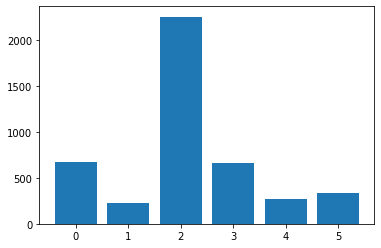

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [19]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm
from xgboost import XGBClassifier

X, y = make_classification(random_state=1)

X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.20,random_state=42)

classifier = RandomForestClassifier(n_estimators = 350, criterion = 'gini', random_state = 42)
#classifier = lgb.LGBMClassifier()
#classifier = svm.SVC(decision_function_shape='ovo')
#classifier = XGBClassifier()

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
#print(np.unique(y_pred))
#print(type(y_pred))

Accuracy_score = accuracy_score(y_val, y_pred)

print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test['Target'],test_pred)
print('Accuracy test data', acc_test)
classification_report = classification_report(test['Target'],test_pred,digits=4)
print(classification_report)
matrix = confusion_matrix( y_val,y_pred)
print(matrix)


Validation Accuracy_score: 0.633484
Accuracy test data 0.6276391554702495
                  precision    recall  f1-score   support

        Analysis     0.5000    0.2078    0.2936        77
      Conclusion     0.7727    0.6538    0.7083        26
           Facts     0.6610    0.8689    0.7508       267
         Invalid     0.4819    0.4819    0.4819        83
           Issue     0.8333    0.2941    0.4348        34
Rule/Law/Holding     0.5714    0.3529    0.4364        34

        accuracy                         0.6276       521
       macro avg     0.6367    0.4766    0.5176       521
    weighted avg     0.6196    0.6276    0.5971       521

[[ 37   3  89  10   0   1]
 [  8  15  12   5   1   1]
 [ 15   2 401  25   0   5]
 [  4   3  54  65   1   3]
 [  4   1  25   1  18   5]
 [  5   2  31   8   0  24]]
